In [212]:
# = steps provided by starter book
## = extra steps by me for learning and breakdown 

In [213]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [214]:
import numpy as np
import pandas as pd

In [215]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [216]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [217]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [218]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [219]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [220]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [221]:
## To see what columns are in Measurement
dir(Measurement)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'date',
 'id',
 'metadata',
 'prcp',
 'prepare',
 'station',
 'tobs']

In [222]:
## To see what columns are in Station
dir(Station)

['__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__weakref__',
 '_decl_class_registry',
 '_sa_class_manager',
 '_sa_decl_prepare',
 '_sa_raise_deferred_config',
 'classes',
 'elevation',
 'id',
 'latitude',
 'longitude',
 'metadata',
 'name',
 'prepare',
 'station']

In [223]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [224]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [225]:
## Table names using inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [226]:
## Get a list of column names and types for measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [227]:
## first 5 rows of table to see how data is stored
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [228]:
## to see table in dictionary form, from Mish's homework review session
import pprint
pp = pprint.PrettyPrinter(indent=4)
a = session.query(Measurement).all()

for row in a:
    pp.pprint(row.__dict__)

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b66cb00>,
    'date': '2010-01-01',
    'id': 1,
    'prcp': 0.08,
    'station': 'USC00519397',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b66cd30>,
    'date': '2010-01-02',
    'id': 2,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 63.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b66cfd0>,
    'date': '2010-01-03',
    'id': 3,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b66ccf8>,
    'date': '2010-01-04',
    'id': 4,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b66c278>,
    'date': '2010-01-06',
    'id': 5,
    'prcp': None,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalc

    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b65a208>,
    'date': '2010-05-30',
    'id': 132,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b65a198>,
    'date': '2010-05-31',
    'id': 133,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b65a048>,
    'date': '2010-06-01',
    'id': 134,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b65afd0>,
    'date': '2010-06-02',
    'id': 135,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b65af60>,
    'date': '2010-06-03',
    'id': 136,
    'prcp': 0.0,
    'st

    'prcp': 0.04,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2692ea90>,
    'date': '2010-09-23',
    'id': 243,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2692e6a0>,
    'date': '2010-09-24',
    'id': 244,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2692e6d8>,
    'date': '2010-09-25',
    'id': 245,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2692ecf8>,
    'date': '2010-09-26',
    'id': 246,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2692e4e0>,
    'date': '2010-09-27',
    'id': 247,
    'prcp': 0.0,
    'st

    'station': 'USC00519397',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27951908>,
    'date': '2011-01-25',
    'id': 354,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 63.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279514a8>,
    'date': '2011-01-27',
    'id': 355,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27951d30>,
    'date': '2011-01-28',
    'id': 356,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27951b00>,
    'date': '2011-01-29',
    'id': 357,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27951c50>,
    'date': '2011-01-30',
    'id': 358,
    'prcp': 0.0,
    'station': 'USC005193

    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278dab38>,
    'date': '2011-07-06',
    'id': 502,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278da0f0>,
    'date': '2011-07-07',
    'id': 503,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278da4e0>,
    'date': '2011-07-08',
    'id': 504,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27286ef0>,
    'date': '2011-07-09',
    'id': 505,
    'prcp': 0.03,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27286438>,
    'date': '2011-07-10',
    'id': 506,
    'prcp': 0.02,
    'station': 'USC00

    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e8e0b8>,
    'date': '2011-12-07',
    'id': 650,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e8e2e8>,
    'date': '2011-12-08',
    'id': 651,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e8ed30>,
    'date': '2011-12-09',
    'id': 652,
    'prcp': 0.13,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e8e4a8>,
    'date': '2011-12-10',
    'id': 653,
    'prcp': 0.07,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e8e588>,
    'date': '2011-12-11',
    'id': 654,
    'prcp': 0.07,
    'station': 'USC00519397',
    'tobs': 73.0}
{   

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268b5cc0>,
    'date': '2012-04-03',
    'id': 765,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268b52b0>,
    'date': '2012-04-04',
    'id': 766,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268b5780>,
    'date': '2012-04-05',
    'id': 767,
    'prcp': 0.19,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268b5d68>,
    'date': '2012-04-06',
    'id': 768,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268b59b0>,
    'date': '2012-04-07',
    'id': 769,
    'prcp': 0.03,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2726de80>,
    'date': '2012-08-25',
    'id': 909,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2726deb8>,
    'date': '2012-08-26',
    'id': 910,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2726dc18>,
    'date': '2012-08-27',
    'id': 911,
    'prcp': 0.02,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2726d2b0>,
    'date': '2012-08-28',
    'id': 912,
    'prcp': 1.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2726dc50>,
    'date': '2012-08-29',
    'id': 913,
    'prcp': 0.02,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e656a0>,
    'date': '2013-01-21',
    'id': 1057,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e658d0>,
    'date': '2013-01-22',
    'id': 1058,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e655f8>,
    'date': '2013-01-23',
    'id': 1059,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e65588>,
    'date': '2013-01-24',
    'id': 1060,
    'prcp': 0.14,
    'station': 'USC00519397',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e65cc0>,
    'date': '2013-01-25',
    'id': 1061,
    'prcp': 0.43,
    'station': 'USC00519397',
    'tobs': 64.0}
{   '_sa_instance_

    'date': '2013-06-18',
    'id': 1205,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c817b8>,
    'date': '2013-06-19',
    'id': 1206,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c818d0>,
    'date': '2013-06-20',
    'id': 1207,
    'prcp': 0.04,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c81860>,
    'date': '2013-06-21',
    'id': 1208,
    'prcp': 0.12,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c81978>,
    'date': '2013-06-22',
    'id': 1209,
    'prcp': 0.04,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c81c50>,
    'date': '201

    'id': 1353,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aaf2e10>,
    'date': '2013-11-14',
    'id': 1354,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aaf2f28>,
    'date': '2013-11-15',
    'id': 1355,
    'prcp': 0.89,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aaf2eb8>,
    'date': '2013-11-16',
    'id': 1356,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aaf2fd0>,
    'date': '2013-11-17',
    'id': 1357,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abf14e0>,
    'date': '2013-11-18',
    'id': 1358,
   

    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad164e0>,
    'date': '2014-04-11',
    'id': 1502,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad16588>,
    'date': '2014-04-12',
    'id': 1503,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad167b8>,
    'date': '2014-04-13',
    'id': 1504,
    'prcp': 0.04,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad167f0>,
    'date': '2014-04-14',
    'id': 1505,
    'prcp': 0.08,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad16e48>,
    'date': '2014-04-15',
    'id': 1506,
    'prcp': 0.0,


    'prcp': 0.39,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adfa898>,
    'date': '2014-09-07',
    'id': 1650,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adfa7b8>,
    'date': '2014-09-08',
    'id': 1651,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 83.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adfa5f8>,
    'date': '2014-09-09',
    'id': 1652,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adfaa58>,
    'date': '2014-09-10',
    'id': 1653,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adfab70>,
    'date': '2014-09-11',
    'id': 1654,
    'prcp': 0.0,
  

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268aa828>,
    'date': '2015-01-28',
    'id': 1792,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268aa588>,
    'date': '2015-01-29',
    'id': 1793,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268aac88>,
    'date': '2015-01-30',
    'id': 1794,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 63.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268aad30>,
    'date': '2015-01-31',
    'id': 1795,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268aac50>,
    'date': '2015-02-01',
    'id': 1796,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 68.0}
{   '_sa_instance_st

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268697f0>,
    'date': '2015-05-26',
    'id': 1909,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268699b0>,
    'date': '2015-05-27',
    'id': 1910,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26869f98>,
    'date': '2015-05-28',
    'id': 1911,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268694a8>,
    'date': '2015-05-29',
    'id': 1912,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26869518>,
    'date': '2015-05-30',
    'id': 1913,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{ 

    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26acf1d0>,
    'date': '2015-10-21',
    'id': 2057,
    'prcp': 0.06,
    'station': 'USC00519397',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26acfc18>,
    'date': '2015-10-22',
    'id': 2058,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26acf860>,
    'date': '2015-10-23',
    'id': 2059,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26acf400>,
    'date': '2015-10-24',
    'id': 2060,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26acf7b8>,
    'date': '2015-10-25',
    'id': 2061,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}


{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268eb6d8>,
    'date': '2016-02-09',
    'id': 2168,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268ebf98>,
    'date': '2016-02-10',
    'id': 2169,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 61.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf268eb748>,
    'date': '2016-02-11',
    'id': 2170,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 62.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27724550>,
    'date': '2016-02-12',
    'id': 2171,
    'prcp': 0.02,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27724860>,
    'date': '2016-02-13',
    'id': 2172,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_s

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26aeaa58>,
    'date': '2016-05-30',
    'id': 2279,
    'prcp': 0.16,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26aea828>,
    'date': '2016-05-31',
    'id': 2280,
    'prcp': 0.05,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26aea4e0>,
    'date': '2016-06-01',
    'id': 2281,
    'prcp': 0.06,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26aea550>,
    'date': '2016-06-02',
    'id': 2282,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26aea240>,
    'date': '2016-06-03',
    'id': 2283,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e75a90>,
    'date': '2016-10-07',
    'id': 2409,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e75b70>,
    'date': '2016-10-08',
    'id': 2410,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e75400>,
    'date': '2016-10-09',
    'id': 2411,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf265d17f0>,
    'date': '2016-10-10',
    'id': 2412,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf26597f28>,
    'date': '2016-10-11',
    'id': 2413,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 80.0}
{   '_sa_instance_st

    'date': '2017-02-13',
    'id': 2538,
    'prcp': 0.01,
    'station': 'USC00519397',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29fc6748>,
    'date': '2017-02-14',
    'id': 2539,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29fc67f0>,
    'date': '2017-02-15',
    'id': 2540,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29fc6898>,
    'date': '2017-02-16',
    'id': 2541,
    'prcp': 0.07,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29fc6940>,
    'date': '2017-02-17',
    'id': 2542,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29fc69e8>,
    'date': '2017-

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a030c88>,
    'date': '2017-06-24',
    'id': 2667,
    'prcp': 0.06,
    'station': 'USC00519397',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a030d30>,
    'date': '2017-06-25',
    'id': 2668,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a030dd8>,
    'date': '2017-06-26',
    'id': 2669,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a030e80>,
    'date': '2017-06-27',
    'id': 2670,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a030f28>,
    'date': '2017-06-28',
    'id': 2671,
    'prcp': 0.0,
    'station': 'USC00519397',
    'tobs': 79.0}
{   '_sa_instance_s

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278f92b0>,
    'date': '2010-03-15',
    'id': 2796,
    'prcp': 0.16,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278f9358>,
    'date': '2010-03-16',
    'id': 2797,
    'prcp': 0.16,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278f9400>,
    'date': '2010-03-17',
    'id': 2798,
    'prcp': 0.4,
    'station': 'USC00513117',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278f94a8>,
    'date': '2010-03-18',
    'id': 2799,
    'prcp': 0.44,
    'station': 'USC00513117',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278f9550>,
    'date': '2010-03-19',
    'id': 2800,
    'prcp': 0.08,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instanc

    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a0eadd8>,
    'date': '2010-07-06',
    'id': 2909,
    'prcp': 0.05,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a0eae80>,
    'date': '2010-07-07',
    'id': 2910,
    'prcp': 0.11,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a0eaf28>,
    'date': '2010-07-08',
    'id': 2911,
    'prcp': 0.04,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a0eafd0>,
    'date': '2010-07-09',
    'id': 2912,
    'prcp': 0.04,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a0d10b8>,
    'date': '2010-07-10',
    'id': 2913,
    'prcp': 0.0

    'prcp': 0.76,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a05e0b8>,
    'date': '2010-12-02',
    'id': 3057,
    'prcp': 0.13,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a05e160>,
    'date': '2010-12-03',
    'id': 3058,
    'prcp': 0.16,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a05e208>,
    'date': '2010-12-04',
    'id': 3059,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a05e2b0>,
    'date': '2010-12-05',
    'id': 3060,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a05e358>,
    'date': '2010-12-06',
    'id': 3061,
    'prcp': 0.0,


    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a04d208>,
    'date': '2011-04-03',
    'id': 3179,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a04d2b0>,
    'date': '2011-04-04',
    'id': 3180,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a04d358>,
    'date': '2011-04-05',
    'id': 3181,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a04d400>,
    'date': '2011-04-06',
    'id': 3182,
    'prcp': 0.09,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a04d4a8>,
    'date': '2011-04-07',
    'id': 3183,
    'prcp': 0.68,

    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e96d30>,
    'date': '2011-08-18',
    'id': 3316,
    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e96dd8>,
    'date': '2011-08-19',
    'id': 3317,
    'prcp': 0.04,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e96e80>,
    'date': '2011-08-20',
    'id': 3318,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e96f28>,
    'date': '2011-08-21',
    'id': 3319,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28e96fd0>,
    'date': '2011-08-22',
    'id': 3320,
    'prcp': 0.28,
    'station': 'USC00513117',
    'tobs': 72.0

    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d30d30>,
    'date': '2012-01-26',
    'id': 3460,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d30dd8>,
    'date': '2012-01-27',
    'id': 3461,
    'prcp': 0.1,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d30e80>,
    'date': '2012-01-28',
    'id': 3462,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d30f28>,
    'date': '2012-01-29',
    'id': 3463,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d30fd0>,
    'date': '2012-01-30',
    'id': 3464,
    'prcp': 0.06,


{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2772f400>,
    'date': '2012-06-04',
    'id': 3590,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2772f4a8>,
    'date': '2012-06-05',
    'id': 3591,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2772f550>,
    'date': '2012-06-06',
    'id': 3592,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2772f5f8>,
    'date': '2012-06-07',
    'id': 3593,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2772f6a0>,
    'date': '2012-06-08',
    'id': 3594,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_s

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27741c88>,
    'date': '2012-10-17',
    'id': 3723,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27741d30>,
    'date': '2012-10-18',
    'id': 3724,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27741dd8>,
    'date': '2012-10-19',
    'id': 3725,
    'prcp': 0.08,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27741e80>,
    'date': '2012-10-20',
    'id': 3726,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27741f28>,
    'date': '2012-10-21',
    'id': 3727,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_s

    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27fbf9e8>,
    'date': '2013-03-07',
    'id': 3863,
    'prcp': 0.06,
    'station': 'USC00513117',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27fbfa90>,
    'date': '2013-03-08',
    'id': 3864,
    'prcp': 0.15,
    'station': 'USC00513117',
    'tobs': 61.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27fbfb38>,
    'date': '2013-03-09',
    'id': 3865,
    'prcp': 0.1,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27fbfbe0>,
    'date': '2013-03-10',
    'id': 3866,
    'prcp': 1.69,
    'station': 'USC00513117',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27fbfc88>,
    'date': '2013-03-11',
    'id': 3867,
    'prcp': 0.8,

    'id': 3995,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a5492b0>,
    'date': '2013-07-19',
    'id': 3996,
    'prcp': 0.05,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a549358>,
    'date': '2013-07-20',
    'id': 3997,
    'prcp': 0.05,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a549400>,
    'date': '2013-07-21',
    'id': 3998,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a5494a8>,
    'date': '2013-07-22',
    'id': 3999,
    'prcp': 0.3,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a549550>,
    'date': '2013-07-23',
    'id': 4000,


    'id': 4130,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3dcc88>,
    'date': '2013-12-02',
    'id': 4131,
    'prcp': 0.93,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3dcd30>,
    'date': '2013-12-03',
    'id': 4132,
    'prcp': 0.8,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3dcdd8>,
    'date': '2013-12-04',
    'id': 4133,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3dce80>,
    'date': '2013-12-05',
    'id': 4134,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3dcf28>,
    'date': '2013-12-06',
    'id': 4135,
   

    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a53df28>,
    'date': '2014-05-01',
    'id': 4279,
    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a53dfd0>,
    'date': '2014-05-02',
    'id': 4280,
    'prcp': 0.57,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a52d0b8>,
    'date': '2014-05-03',
    'id': 4281,
    'prcp': 0.3,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a52d160>,
    'date': '2014-05-04',
    'id': 4282,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a52d208>,
    'date': '2014-05-05',
    'id': 4283,
    'prcp': 0.02,

    'id': 4420,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4f6dd8>,
    'date': '2014-09-23',
    'id': 4421,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4f6e80>,
    'date': '2014-09-24',
    'id': 4422,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4f6f28>,
    'date': '2014-09-25',
    'id': 4423,
    'prcp': 0.14,
    'station': 'USC00513117',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4f6fd0>,
    'date': '2014-09-26',
    'id': 4424,
    'prcp': 0.3,
    'station': 'USC00513117',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4fa0b8>,
    'date': '2014-09-27',
    'id': 4425,
 

    'date': '2015-02-02',
    'id': 4552,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2932c5f8>,
    'date': '2015-02-03',
    'id': 4553,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2932c6a0>,
    'date': '2015-02-04',
    'id': 4554,
    'prcp': 0.77,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2932c748>,
    'date': '2015-02-05',
    'id': 4555,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2932c7f0>,
    'date': '2015-02-06',
    'id': 4556,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2932c898>,
    'date': '2015-0

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2930bda0>,
    'date': '2015-06-19',
    'id': 4686,
    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2930b9b0>,
    'date': '2015-06-20',
    'id': 4687,
    'prcp': 0.04,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2930bcc0>,
    'date': '2015-06-21',
    'id': 4688,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d910b8>,
    'date': '2015-06-22',
    'id': 4689,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d91160>,
    'date': '2015-06-23',
    'id': 4690,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 76.

    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d5bbe0>,
    'date': '2015-12-02',
    'id': 4826,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d5bc88>,
    'date': '2015-12-03',
    'id': 4827,
    'prcp': 0.08,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d5bd30>,
    'date': '2015-12-04',
    'id': 4828,
    'prcp': 0.01,
    'station': 'USC00513117',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d5bdd8>,
    'date': '2015-12-05',
    'id': 4829,
    'prcp': 0.28,
    'station': 'USC00513117',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29d5be80>,
    'date': '2015-12-06',
    'id': 4830,
    'prcp': 0.52,
    'station': 

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a11dbe0>,
    'date': '2016-03-31',
    'id': 4946,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a11dc88>,
    'date': '2016-04-01',
    'id': 4947,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a11dd30>,
    'date': '2016-04-02',
    'id': 4948,
    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a11ddd8>,
    'date': '2016-04-03',
    'id': 4949,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a11de80>,
    'date': '2016-04-04',
    'id': 4950,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_s

    'date': '2016-08-20',
    'id': 5088,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27938b38>,
    'date': '2016-08-21',
    'id': 5089,
    'prcp': 0.32,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27938be0>,
    'date': '2016-08-22',
    'id': 5090,
    'prcp': 0.94,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27938c88>,
    'date': '2016-08-23',
    'id': 5091,
    'prcp': 0.15,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27938d30>,
    'date': '2016-08-24',
    'id': 5092,
    'prcp': 2.15,
    'station': 'USC00513117',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27938dd8>,
    'date': '20

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f472b0>,
    'date': '2016-12-30',
    'id': 5220,
    'prcp': 0.21,
    'station': 'USC00513117',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f47358>,
    'date': '2016-12-31',
    'id': 5221,
    'prcp': 0.62,
    'station': 'USC00513117',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f47400>,
    'date': '2017-01-01',
    'id': 5222,
    'prcp': 0.29,
    'station': 'USC00513117',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f474a8>,
    'date': '2017-01-02',
    'id': 5223,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f47550>,
    'date': '2017-01-03',
    'id': 5224,
    'prcp': 0.0,
    'station': 'USC00513117',
    'tobs': 65.0}
{   '_sa_instance

    'date': '2017-05-11',
    'id': 5352,
    'prcp': 0.03,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2add9b38>,
    'date': '2017-05-12',
    'id': 5353,
    'prcp': 0.04,
    'station': 'USC00513117',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2add9be0>,
    'date': '2017-05-13',
    'id': 5354,
    'prcp': 0.02,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2add9c88>,
    'date': '2017-05-14',
    'id': 5355,
    'prcp': 0.05,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2add9d30>,
    'date': '2017-05-15',
    'id': 5356,
    'prcp': 0.08,
    'station': 'USC00513117',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2add9dd8>,
    'date': '20

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4607f0>,
    'date': '2010-05-02',
    'id': 5492,
    'prcp': 0.02,
    'station': 'USC00514830',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a460898>,
    'date': '2010-05-03',
    'id': 5493,
    'prcp': 0.75,
    'station': 'USC00514830',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a460940>,
    'date': '2010-05-04',
    'id': 5494,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4609e8>,
    'date': '2010-05-05',
    'id': 5495,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a460a90>,
    'date': '2010-05-06',
    'id': 5496,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 73.0}
{   '_sa_instance_

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a47e0b8>,
    'date': '2010-09-20',
    'id': 5625,
    'prcp': 0.03,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a47e160>,
    'date': '2010-09-21',
    'id': 5626,
    'prcp': 0.01,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a47e208>,
    'date': '2010-09-22',
    'id': 5627,
    'prcp': 0.41,
    'station': 'USC00514830',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a47e2b0>,
    'date': '2010-09-23',
    'id': 5628,
    'prcp': 0.57,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a47e358>,
    'date': '2010-09-24',
    'id': 5629,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 76.0

    'prcp': None,
    'station': 'USC00514830',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b31ca90>,
    'date': '2011-02-14',
    'id': 5760,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b31cb38>,
    'date': '2011-02-15',
    'id': 5761,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b31cbe0>,
    'date': '2011-02-17',
    'id': 5762,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b31cc88>,
    'date': '2011-02-18',
    'id': 5763,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b31cd30>,
    'date': '2011-02-20',
    'id': 5764,
    'prcp': None,


    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3a3c88>,
    'date': '2011-07-16',
    'id': 5883,
    'prcp': 0.02,
    'station': 'USC00514830',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3a3d30>,
    'date': '2011-07-18',
    'id': 5884,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3a3dd8>,
    'date': '2011-07-19',
    'id': 5885,
    'prcp': 0.01,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3a3e80>,
    'date': '2011-07-20',
    'id': 5886,
    'prcp': 0.1,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3a3f28>,
    'date': '2011-07-21',
    'id': 5887,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 76.0}

    'prcp': 0.25,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29035f28>,
    'date': '2011-12-22',
    'id': 6007,
    'prcp': 0.12,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29035fd0>,
    'date': '2011-12-24',
    'id': 6008,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2905f0b8>,
    'date': '2011-12-26',
    'id': 6009,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2905f160>,
    'date': '2011-12-27',
    'id': 6010,
    'prcp': 0.03,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2905f208>,
    'date': '2011-12-29',
    'id': 6011,
    'prcp': Non

    'date': '2012-04-25',
    'id': 6104,
    'prcp': 0.07,
    'station': 'USC00514830',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290240b8>,
    'date': '2012-04-26',
    'id': 6105,
    'prcp': 0.01,
    'station': 'USC00514830',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29024160>,
    'date': '2012-04-27',
    'id': 6106,
    'prcp': 0.07,
    'station': 'USC00514830',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29024208>,
    'date': '2012-04-30',
    'id': 6107,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290242b0>,
    'date': '2012-06-21',
    'id': 6108,
    'prcp': 0.08,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29024358>,
    'date': '20

    'id': 6233,
    'prcp': 0.03,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f2e6a0>,
    'date': '2012-11-20',
    'id': 6234,
    'prcp': 0.02,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f2e748>,
    'date': '2012-11-21',
    'id': 6235,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f2e7f0>,
    'date': '2012-11-24',
    'id': 6236,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f2e898>,
    'date': '2012-11-27',
    'id': 6237,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29f2e940>,
    'date': '2012-11-28',
    'id': 6238,


{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fe37f0>,
    'date': '2013-04-09',
    'id': 6332,
    'prcp': 0.2,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fe3898>,
    'date': '2013-04-10',
    'id': 6333,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fe3940>,
    'date': '2013-04-11',
    'id': 6334,
    'prcp': 0.01,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fe39e8>,
    'date': '2013-04-12',
    'id': 6335,
    'prcp': 0.05,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fe3a90>,
    'date': '2013-04-13',
    'id': 6336,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 73.0}
{   '_sa_instance_

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e612b0>,
    'date': '2013-10-08',
    'id': 6468,
    'prcp': 0.01,
    'station': 'USC00514830',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e61358>,
    'date': '2013-10-09',
    'id': 6469,
    'prcp': 0.31,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e61400>,
    'date': '2013-10-10',
    'id': 6470,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e614a8>,
    'date': '2013-10-11',
    'id': 6471,
    'prcp': 1.95,
    'station': 'USC00514830',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e61550>,
    'date': '2013-10-14',
    'id': 6472,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instanc

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28985160>,
    'date': '2014-04-08',
    'id': 6611,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28985278>,
    'date': '2014-04-09',
    'id': 6612,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28985550>,
    'date': '2014-04-10',
    'id': 6613,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28985470>,
    'date': '2014-04-11',
    'id': 6614,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289852b0>,
    'date': '2014-04-12',
    'id': 6615,
    'prcp': 0.04,
    'station': 'USC00514830',
    'tobs': 70.0}
{   '_sa_instance_s

    'date': '2014-08-13',
    'id': 6722,
    'prcp': 0.1,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28990c88>,
    'date': '2014-08-14',
    'id': 6723,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28990d30>,
    'date': '2014-08-15',
    'id': 6724,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28990dd8>,
    'date': '2014-08-17',
    'id': 6725,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28990e80>,
    'date': '2014-08-18',
    'id': 6726,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28990f28>,
    'date': '2014-0

    'id': 6870,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b376f28>,
    'date': '2015-02-25',
    'id': 6871,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b376fd0>,
    'date': '2015-02-26',
    'id': 6872,
    'prcp': 0.41,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3660b8>,
    'date': '2015-03-01',
    'id': 6873,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b366160>,
    'date': '2015-03-02',
    'id': 6874,
    'prcp': 0.04,
    'station': 'USC00514830',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b366208>,
    'date': '2015-03-03',
    'id': 6875,
 

    'id': 7018,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 84.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b42a208>,
    'date': '2015-09-01',
    'id': 7019,
    'prcp': 0.22,
    'station': 'USC00514830',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b42a2b0>,
    'date': '2015-09-02',
    'id': 7020,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b42a358>,
    'date': '2015-09-03',
    'id': 7021,
    'prcp': 0.19,
    'station': 'USC00514830',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b42a400>,
    'date': '2015-09-04',
    'id': 7022,
    'prcp': 0.24,
    'station': 'USC00514830',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b42a4a8>,
    'date': '2015-09-05',
    'id': 7023,


    'prcp': 0.03,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adba4a8>,
    'date': '2016-02-17',
    'id': 7167,
    'prcp': 0.13,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adba550>,
    'date': '2016-02-18',
    'id': 7168,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adba5f8>,
    'date': '2016-02-19',
    'id': 7169,
    'prcp': 0.09,
    'station': 'USC00514830',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adba6a0>,
    'date': '2016-02-20',
    'id': 7170,
    'prcp': 0.09,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2adba748>,
    'date': '2016-02-22',
    'id': 7171,
    'prcp': None

    'station': 'USC00514830',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a498748>,
    'date': '2016-08-03',
    'id': 7315,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4987f0>,
    'date': '2016-08-06',
    'id': 7316,
    'prcp': None,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a498898>,
    'date': '2016-08-07',
    'id': 7317,
    'prcp': 0.48,
    'station': 'USC00514830',
    'tobs': 83.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a498940>,
    'date': '2016-08-08',
    'id': 7318,
    'prcp': 0.01,
    'station': 'USC00514830',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4989e8>,
    'date': '2016-08-09',
    'id': 7319,
    'prcp': 0.0,
    'station': 'U

    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a497160>,
    'date': '2016-12-16',
    'id': 7426,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a497208>,
    'date': '2016-12-17',
    'id': 7427,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4972b0>,
    'date': '2016-12-18',
    'id': 7428,
    'prcp': 0.04,
    'station': 'USC00514830',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a497358>,
    'date': '2016-12-19',
    'id': 7429,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a497400>,
    'date': '2016-12-20',
    'id': 7430,
    'prcp': 0.0,
    'station': 'USC

    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a342400>,
    'date': '2017-06-09',
    'id': 7574,
    'prcp': 0.0,
    'station': 'USC00514830',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3424a8>,
    'date': '2017-06-10',
    'id': 7575,
    'prcp': 0.53,
    'station': 'USC00514830',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a342550>,
    'date': '2017-06-11',
    'id': 7576,
    'prcp': 0.14,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3425f8>,
    'date': '2017-06-12',
    'id': 7577,
    'prcp': 0.35,
    'station': 'USC00514830',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3426a0>,
    'date': '2017-06-13',
    'id': 7578,
    'prcp': 0.1,
    'station': 'USC00514830',
    'tobs': 75.0}

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29dca6a0>,
    'date': '2010-09-20',
    'id': 7722,
    'prcp': 0.01,
    'station': 'USC00517948',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29dca748>,
    'date': '2010-09-21',
    'id': 7723,
    'prcp': 0.26,
    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29dca7f0>,
    'date': '2010-09-22',
    'id': 7724,
    'prcp': 0.04,
    'station': 'USC00517948',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29dca898>,
    'date': '2010-09-23',
    'id': 7725,
    'prcp': 0.01,
    'station': 'USC00517948',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29dca940>,
    'date': '2010-09-24',
    'id': 7726,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 75.0}
{   '_sa_instanc

    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2906e7f0>,
    'date': '2011-06-09',
    'id': 7868,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2906e898>,
    'date': '2011-06-13',
    'id': 7869,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2906e940>,
    'date': '2011-06-14',
    'id': 7870,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2906e9e8>,
    'date': '2011-06-15',
    'id': 7871,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2906ea90>,
    'date': '2011-06-16',
    'id': 7872,
    'prcp': None,
    'station': 'US

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2890b358>,
    'date': '2011-12-14',
    'id': 7981,
    'prcp': 0.86,
    'station': 'USC00517948',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2890b400>,
    'date': '2011-12-15',
    'id': 7982,
    'prcp': 0.02,
    'station': 'USC00517948',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2890b4a8>,
    'date': '2011-12-16',
    'id': 7983,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2890b550>,
    'date': '2012-01-04',
    'id': 7984,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2890b5f8>,
    'date': '2012-01-05',
    'id': 7985,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 74.0}
{   '_sa_instance

    'date': '2012-12-13',
    'id': 8129,
    'prcp': 0.04,
    'station': 'USC00517948',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2896c668>,
    'date': '2012-12-14',
    'id': 8130,
    'prcp': 0.07,
    'station': 'USC00517948',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2896c4a8>,
    'date': '2012-12-27',
    'id': 8131,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2896c908>,
    'date': '2012-12-28',
    'id': 8132,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2896ca20>,
    'date': '2013-02-01',
    'id': 8133,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2896c828>,
    'date': '201

    'id': 8240,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289750b8>,
    'date': '2013-08-06',
    'id': 8241,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28975160>,
    'date': '2013-08-07',
    'id': 8242,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28975208>,
    'date': '2013-08-08',
    'id': 8243,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289752b0>,
    'date': '2013-08-09',
    'id': 8244,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28975358>,
    'date': '2013-08-12',
    'id': 8245,
 

    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291c6dd8>,
    'date': '2014-04-10',
    'id': 8381,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291c6e80>,
    'date': '2014-04-11',
    'id': 8382,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291c6f28>,
    'date': '2014-04-14',
    'id': 8383,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291c6fd0>,
    'date': '2014-04-15',
    'id': 8384,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291d70b8>,
    'date': '2014-04-16',
    'id': 8385,
    'prcp': 0.06,


    'prcp': None,
    'station': 'USC00517948',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e3fd30>,
    'date': '2014-11-17',
    'id': 8500,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e3fdd8>,
    'date': '2014-11-18',
    'id': 8501,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e3fe80>,
    'date': '2014-11-19',
    'id': 8502,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e3ff28>,
    'date': '2014-11-20',
    'id': 8503,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e3ffd0>,
    'date': '2014-11-21',
    'id': 8504,
    'prcp': None,

    'station': 'USC00517948',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28887f60>,
    'date': '2015-10-12',
    'id': 8648,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288850b8>,
    'date': '2015-10-13',
    'id': 8649,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28885160>,
    'date': '2015-10-14',
    'id': 8650,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28885208>,
    'date': '2015-10-15',
    'id': 8651,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288852b0>,
    'date': '2015-10-16',
    'id': 8652,
    'prcp': None,
    'station': 

    'station': 'USC00517948',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288af2b0>,
    'date': '2016-07-06',
    'id': 8796,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288af358>,
    'date': '2016-07-07',
    'id': 8797,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288af400>,
    'date': '2016-07-08',
    'id': 8798,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288af4a8>,
    'date': '2016-07-11',
    'id': 8799,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288af550>,
    'date': '2016-07-12',
    'id': 8800,
    'prcp': None,
    'station': 

    'id': 8926,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288fa9e8>,
    'date': '2017-02-15',
    'id': 8927,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288faa90>,
    'date': '2017-02-16',
    'id': 8928,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288fab38>,
    'date': '2017-02-17',
    'id': 8929,
    'prcp': 0.0,
    'station': 'USC00517948',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288fabe0>,
    'date': '2017-02-21',
    'id': 8930,
    'prcp': None,
    'station': 'USC00517948',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf288fac88>,
    'date': '2017-02-22',
    'id': 8931,
 

    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b03f28>,
    'date': '2010-03-11',
    'id': 9055,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b03fd0>,
    'date': '2010-03-12',
    'id': 9056,
    'prcp': 0.04,
    'station': 'USC00518838',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b210b8>,
    'date': '2010-03-13',
    'id': 9057,
    'prcp': 0.03,
    'station': 'USC00518838',
    'tobs': 62.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b21160>,
    'date': '2010-03-14',
    'id': 9058,
    'prcp': 0.02,
    'station': 'USC00518838',
    'tobs': 62.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b21208>,
    'date': '2010-03-15',
    'id': 9059,
    'prcp': 0.13,
    'station': 'USC00518838',
    'tobs': 65.

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3820b8>,
    'date': '2010-10-14',
    'id': 9201,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b382160>,
    'date': '2010-10-17',
    'id': 9202,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b382208>,
    'date': '2010-10-20',
    'id': 9203,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3822b0>,
    'date': '2010-10-22',
    'id': 9204,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b382358>,
    'date': '2010-10-24',
    'id': 9205,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 76.0}
{   '_sa_instan

    'date': '2011-04-21',
    'id': 9306,
    'prcp': 0.19,
    'station': 'USC00518838',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b399470>,
    'date': '2011-04-25',
    'id': 9307,
    'prcp': 0.0,
    'station': 'USC00518838',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b399be0>,
    'date': '2011-04-26',
    'id': 9308,
    'prcp': 0.1,
    'station': 'USC00518838',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b3993c8>,
    'date': '2011-04-27',
    'id': 9309,
    'prcp': 0.2,
    'station': 'USC00518838',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b399c88>,
    'date': '2011-04-28',
    'id': 9310,
    'prcp': 0.06,
    'station': 'USC00518838',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b399cc0>,
    'date': '2011-

    'date': '2012-10-15',
    'id': 9425,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291946a0>,
    'date': '2012-10-16',
    'id': 9426,
    'prcp': 0.11,
    'station': 'USC00518838',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29194748>,
    'date': '2012-10-17',
    'id': 9427,
    'prcp': 0.0,
    'station': 'USC00518838',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf291947f0>,
    'date': '2012-10-18',
    'id': 9428,
    'prcp': 0.02,
    'station': 'USC00518838',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29194898>,
    'date': '2012-10-22',
    'id': 9429,
    'prcp': None,
    'station': 'USC00518838',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf29194940>,
    'date': '201

    'date': '2010-02-24',
    'id': 9573,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 62.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ae5d940>,
    'date': '2010-02-25',
    'id': 9574,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ae5d9e8>,
    'date': '2010-02-26',
    'id': 9575,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ae5da90>,
    'date': '2010-02-27',
    'id': 9576,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ae5db38>,
    'date': '2010-02-28',
    'id': 9577,
    'prcp': 0.19,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ae5dbe0>,
    'date': '2010-

    'id': 9684,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abdf358>,
    'date': '2010-06-18',
    'id': 9685,
    'prcp': 0.14,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abdf400>,
    'date': '2010-06-19',
    'id': 9686,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abdf4a8>,
    'date': '2010-06-20',
    'id': 9687,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abdf550>,
    'date': '2010-06-21',
    'id': 9688,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abdf5f8>,
    'date': '2010-06-22',
    'id': 9689,
   

    'prcp': 0.24,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abccdd8>,
    'date': '2010-11-02',
    'id': 9821,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abcce80>,
    'date': '2010-11-03',
    'id': 9822,
    'prcp': 0.42,
    'station': 'USC00519523',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abccf28>,
    'date': '2010-11-04',
    'id': 9823,
    'prcp': 1.34,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abccfd0>,
    'date': '2010-11-05',
    'id': 9824,
    'prcp': 0.03,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2abd10b8>,
    'date': '2010-11-06',
    'id': 9825,
    'prcp': 0.16

    'prcp': 0.22,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a593fd0>,
    'date': '2011-03-06',
    'id': 9944,
    'prcp': 0.27,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a58d0b8>,
    'date': '2011-03-07',
    'id': 9945,
    'prcp': 0.03,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a58d160>,
    'date': '2011-03-08',
    'id': 9946,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a58d208>,
    'date': '2011-03-09',
    'id': 9947,
    'prcp': 0.9,
    'station': 'USC00519523',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a58d2b0>,
    'date': '2011-03-10',
    'id': 9948,
    'prcp': 0.27

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3e1b38>,
    'date': '2011-07-22',
    'id': 10081,
    'prcp': 0.09,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3e1be0>,
    'date': '2011-07-23',
    'id': 10082,
    'prcp': 0.08,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3e1c88>,
    'date': '2011-07-24',
    'id': 10083,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3e1d30>,
    'date': '2011-07-25',
    'id': 10084,
    'prcp': 0.12,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3e1dd8>,
    'date': '2011-07-26',
    'id': 10085,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_ins

    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a30cc88>,
    'date': '2011-11-22',
    'id': 10203,
    'prcp': 0.1,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a30cd30>,
    'date': '2011-11-23',
    'id': 10204,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a30cdd8>,
    'date': '2011-11-24',
    'id': 10205,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a30ce80>,
    'date': '2011-11-25',
    'id': 10206,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a30cf28>,
    'date': '2011-11-26',
    'id': 10207,
    'prcp': 0.0,
    'station':

    'id': 10304,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3111d0>,
    'date': '2012-03-03',
    'id': 10305,
    'prcp': 0.11,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3112e8>,
    'date': '2012-03-04',
    'id': 10306,
    'prcp': 0.1,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a311240>,
    'date': '2012-03-05',
    'id': 10307,
    'prcp': 2.71,
    'station': 'USC00519523',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3113c8>,
    'date': '2012-03-06',
    'id': 10308,
    'prcp': 6.38,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a3115f8>,
    'date': '2012-03-07',
    'id': 10

    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fd5ac8>,
    'date': '2012-05-25',
    'id': 10388,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fd58d0>,
    'date': '2012-05-26',
    'id': 10389,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fd5d68>,
    'date': '2012-05-27',
    'id': 10390,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fd5e80>,
    'date': '2012-05-28',
    'id': 10391,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28fd5e10>,
    'date': '2012-05-29',
    'id': 10392,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 7

    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28faa940>,
    'date': '2012-08-31',
    'id': 10486,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28faa9e8>,
    'date': '2012-09-01',
    'id': 10487,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28faaa90>,
    'date': '2012-09-02',
    'id': 10488,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28faab38>,
    'date': '2012-09-03',
    'id': 10489,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28faabe0>,
    'date': '2012-09-04',
    'id': 10490,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 74.

    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f79f28>,
    'date': '2012-12-15',
    'id': 10591,
    'prcp': 0.12,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f79fd0>,
    'date': '2012-12-16',
    'id': 10592,
    'prcp': 0.04,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f8c0b8>,
    'date': '2012-12-17',
    'id': 10593,
    'prcp': 0.09,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f8c160>,
    'date': '2012-12-18',
    'id': 10594,
    'prcp': 0.22,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f8c208>,
    'date': '2012-12-19',
    'id': 10595,
    'prcp': 0.04,
    'stati

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f674a8>,
    'date': '2013-02-10',
    'id': 10647,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f67550>,
    'date': '2013-02-11',
    'id': 10648,
    'prcp': 0.08,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f675f8>,
    'date': '2013-02-12',
    'id': 10649,
    'prcp': 0.06,
    'station': 'USC00519523',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f676a0>,
    'date': '2013-02-13',
    'id': 10650,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f67748>,
    'date': '2013-02-14',
    'id': 10651,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 71.0}
{   '_sa_inst

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27aca5f8>,
    'date': '2013-05-21',
    'id': 10745,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27aca6a0>,
    'date': '2013-05-22',
    'id': 10746,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27aca748>,
    'date': '2013-05-23',
    'id': 10747,
    'prcp': 0.03,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27aca7f0>,
    'date': '2013-05-24',
    'id': 10748,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27aca898>,
    'date': '2013-05-25',
    'id': 10749,
    'prcp': 0.08,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_inst

    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e9c4a8>,
    'date': '2013-09-20',
    'id': 10863,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e9c550>,
    'date': '2013-09-22',
    'id': 10864,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e9c5f8>,
    'date': '2013-09-23',
    'id': 10865,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e9c6a0>,
    'date': '2013-09-25',
    'id': 10866,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27e9c748>,
    'date': '2013-09-26',
    'id': 10867,
    'prcp': 0.49,
    'station': 'USC00519523',
    'tobs': 

    'date': '2014-01-22',
    'id': 10980,
    'prcp': 0.31,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ebf358>,
    'date': '2014-01-24',
    'id': 10981,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 58.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ebf400>,
    'date': '2014-01-25',
    'id': 10982,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ebf4a8>,
    'date': '2014-01-27',
    'id': 10983,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ebf550>,
    'date': '2014-01-28',
    'id': 10984,
    'prcp': 0.44,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ebf5f8>,
    'date':

    'date': '2014-05-22',
    'id': 11091,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2885ad30>,
    'date': '2014-05-23',
    'id': 11092,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2885add8>,
    'date': '2014-05-24',
    'id': 11093,
    'prcp': 0.14,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2885ae80>,
    'date': '2014-05-25',
    'id': 11094,
    'prcp': 0.45,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2885af28>,
    'date': '2014-05-26',
    'id': 11095,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2885afd0>,
    'date': 

    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28aefa90>,
    'date': '2014-10-01',
    'id': 11208,
    'prcp': 0.87,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28aefb38>,
    'date': '2014-10-02',
    'id': 11209,
    'prcp': 0.02,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28aefbe0>,
    'date': '2014-10-03',
    'id': 11210,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28aefc88>,
    'date': '2014-10-04',
    'id': 11211,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28aefd30>,
    'date': '2014-10-05',
    'id': 11212,
    'prcp': 0.26,
    'station': 'USC00519523',
    'tobs': 

    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28acf4a8>,
    'date': '2015-01-04',
    'id': 11295,
    'prcp': 0.03,
    'station': 'USC00519523',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28acf550>,
    'date': '2015-01-05',
    'id': 11296,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 61.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28acf5f8>,
    'date': '2015-01-06',
    'id': 11297,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28acf6a0>,
    'date': '2015-01-07',
    'id': 11298,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28acf748>,
    'date': '2015-01-08',
    'id': 11299,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 67

    'prcp': None,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b0fe2b0>,
    'date': '2015-04-12',
    'id': 11388,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b0fe358>,
    'date': '2015-04-13',
    'id': 11389,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b0fe400>,
    'date': '2015-04-14',
    'id': 11390,
    'prcp': 0.07,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b0fe4a8>,
    'date': '2015-04-15',
    'id': 11391,
    'prcp': 0.02,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b0fe550>,
    'date': '2015-04-16',
    'id': 11392,
    'prcp': 

    'prcp': 0.12,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac0e400>,
    'date': '2015-08-18',
    'id': 11510,
    'prcp': 1.14,
    'station': 'USC00519523',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac0e4a8>,
    'date': '2015-08-19',
    'id': 11511,
    'prcp': 0.42,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac0e550>,
    'date': '2015-08-20',
    'id': 11512,
    'prcp': 1.05,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac0e5f8>,
    'date': '2015-08-22',
    'id': 11513,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac0e6a0>,
    'date': '2015-08-23',
    'id': 11514,
    'prcp'

    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac1cb38>,
    'date': '2016-01-09',
    'id': 11641,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac1cbe0>,
    'date': '2016-01-10',
    'id': 11642,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac1cc88>,
    'date': '2016-01-11',
    'id': 11643,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac1cd30>,
    'date': '2016-01-12',
    'id': 11644,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac1cdd8>,
    'date': '2016-01-13',
    'id': 11645,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 64.

    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aae1550>,
    'date': '2016-05-12',
    'id': 11752,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aae15f8>,
    'date': '2016-05-13',
    'id': 11753,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aae16a0>,
    'date': '2016-05-14',
    'id': 11754,
    'prcp': 0.06,
    'station': 'USC00519523',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aae1748>,
    'date': '2016-05-15',
    'id': 11755,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aae17f0>,
    'date': '2016-05-16',
    'id': 11756,
    'prcp': 0.0,
    'station':

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ee5c88>,
    'date': '2016-08-31',
    'id': 11859,
    'prcp': 0.25,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ee5d30>,
    'date': '2016-09-02',
    'id': 11860,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ee5dd8>,
    'date': '2016-09-03',
    'id': 11861,
    'prcp': 0.08,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ee5e80>,
    'date': '2016-09-04',
    'id': 11862,
    'prcp': 0.74,
    'station': 'USC00519523',
    'tobs': 84.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27ee5f28>,
    'date': '2016-09-05',
    'id': 11863,
    'prcp': 0.02,
    'station': 'USC00519523',
    'tobs': 84.0}
{   '_sa_i

    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b4732b0>,
    'date': '2017-01-15',
    'id': 11988,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b473358>,
    'date': '2017-01-16',
    'id': 11989,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b473400>,
    'date': '2017-01-18',
    'id': 11990,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b4734a8>,
    'date': '2017-01-19',
    'id': 11991,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b473550>,
    'date': '2017-01-20',
    'id': 11992,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 7

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b444fd0>,
    'date': '2017-06-17',
    'id': 12128,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b46a0b8>,
    'date': '2017-06-18',
    'id': 12129,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b46a160>,
    'date': '2017-06-19',
    'id': 12130,
    'prcp': 0.01,
    'station': 'USC00519523',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b46a208>,
    'date': '2017-06-21',
    'id': 12131,
    'prcp': None,
    'station': 'USC00519523',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b46a2b0>,
    'date': '2017-06-22',
    'id': 12132,
    'prcp': 0.0,
    'station': 'USC00519523',
    'tobs': 80.0}
{   '_sa_inst

    'station': 'USC00519281',
    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b09aa90>,
    'date': '2010-03-18',
    'id': 12264,
    'prcp': 0.69,
    'station': 'USC00519281',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b09ab38>,
    'date': '2010-03-19',
    'id': 12265,
    'prcp': 0.19,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b09abe0>,
    'date': '2010-03-20',
    'id': 12266,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b09ac88>,
    'date': '2010-03-21',
    'id': 12267,
    'prcp': 0.05,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2b09ad30>,
    'date': '2010-03-22',
    'id': 12268,
    'prcp': 0.0,
    'station

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2915b358>,
    'date': '2010-07-29',
    'id': 12397,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2915b400>,
    'date': '2010-07-30',
    'id': 12398,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2915b4a8>,
    'date': '2010-07-31',
    'id': 12399,
    'prcp': 0.04,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2915b550>,
    'date': '2010-08-01',
    'id': 12400,
    'prcp': 0.14,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2915b5f8>,
    'date': '2010-08-02',
    'id': 12401,
    'prcp': 0.27,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_in

    'id': 12535,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad4cfd0>,
    'date': '2010-12-16',
    'id': 12536,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad710b8>,
    'date': '2010-12-17',
    'id': 12537,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad71160>,
    'date': '2010-12-18',
    'id': 12538,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad71208>,
    'date': '2010-12-19',
    'id': 12539,
    'prcp': 2.77,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad712b0>,
    'date': '2010-12-20',
    'id': 1254

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acac898>,
    'date': '2011-04-28',
    'id': 12669,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acac940>,
    'date': '2011-04-29',
    'id': 12670,
    'prcp': 0.06,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acac9e8>,
    'date': '2011-04-30',
    'id': 12671,
    'prcp': 0.41,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acaca90>,
    'date': '2011-05-01',
    'id': 12672,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acacb38>,
    'date': '2011-05-02',
    'id': 12673,
    'prcp': 1.58,
    'station': 'USC00519281',
    'tobs': 70.0}
{   '_sa_in

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acb2be0>,
    'date': '2011-09-28',
    'id': 12818,
    'prcp': 0.1,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acb2c88>,
    'date': '2011-09-29',
    'id': 12819,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acb2d30>,
    'date': '2011-09-30',
    'id': 12820,
    'prcp': 0.08,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acb2dd8>,
    'date': '2011-10-01',
    'id': 12821,
    'prcp': 0.01,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acb2e80>,
    'date': '2011-10-02',
    'id': 12822,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_ins

    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28ca9208>,
    'date': '2012-01-11',
    'id': 12923,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28ca92b0>,
    'date': '2012-01-12',
    'id': 12924,
    'prcp': 0.07,
    'station': 'USC00519281',
    'tobs': 62.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28ca9358>,
    'date': '2012-01-13',
    'id': 12925,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28ca9400>,
    'date': '2012-01-14',
    'id': 12926,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28ca94a8>,
    'date': '2012-01-15',
    'id': 12927,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 74

    'date': '2012-06-01',
    'id': 13065,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a429160>,
    'date': '2012-06-02',
    'id': 13066,
    'prcp': 0.08,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a429208>,
    'date': '2012-06-03',
    'id': 13067,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a4292b0>,
    'date': '2012-06-04',
    'id': 13068,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a429358>,
    'date': '2012-06-05',
    'id': 13069,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a429400>,
    'date': '

    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290bbbe0>,
    'date': '2012-10-16',
    'id': 13202,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290bbc88>,
    'date': '2012-10-17',
    'id': 13203,
    'prcp': 0.23,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290bbd30>,
    'date': '2012-10-18',
    'id': 13204,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290bbdd8>,
    'date': '2012-10-19',
    'id': 13205,
    'prcp': 0.09,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290bbe80>,
    'date': '2012-10-20',
    'id': 13206,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs':

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290a8940>,
    'date': '2013-02-09',
    'id': 13318,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290a89e8>,
    'date': '2013-02-10',
    'id': 13319,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290a8a90>,
    'date': '2013-02-11',
    'id': 13320,
    'prcp': 0.14,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290a8b38>,
    'date': '2013-02-12',
    'id': 13321,
    'prcp': 0.06,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290a8be0>,
    'date': '2013-02-13',
    'id': 13322,
    'prcp': 0.05,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_ins

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279aef28>,
    'date': '2013-05-25',
    'id': 13423,
    'prcp': 0.13,
    'station': 'USC00519281',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279aefd0>,
    'date': '2013-05-26',
    'id': 13424,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279900b8>,
    'date': '2013-05-27',
    'id': 13425,
    'prcp': 0.05,
    'station': 'USC00519281',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27990160>,
    'date': '2013-05-28',
    'id': 13426,
    'prcp': 0.04,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27990208>,
    'date': '2013-05-29',
    'id': 13427,
    'prcp': 1.87,
    'station': 'USC00519281',
    'tobs'

    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279a4a90>,
    'date': '2013-08-22',
    'id': 13512,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279a4b38>,
    'date': '2013-08-23',
    'id': 13513,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279a4be0>,
    'date': '2013-08-24',
    'id': 13514,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279a4c88>,
    'date': '2013-08-25',
    'id': 13515,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf279a4d30>,
    'date': '2013-08-26',
    'id': 13516,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 75

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a07b38>,
    'date': '2013-11-27',
    'id': 13609,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a07be0>,
    'date': '2013-11-28',
    'id': 13610,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a07c88>,
    'date': '2013-11-29',
    'id': 13611,
    'prcp': 0.84,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a07d30>,
    'date': '2013-11-30',
    'id': 13612,
    'prcp': 0.88,
    'station': 'USC00519281',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a07dd8>,
    'date': '2013-12-01',
    'id': 13613,
    'prcp': 0.12,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_in

    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a2b5f8>,
    'date': '2014-03-19',
    'id': 13721,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a2b6a0>,
    'date': '2014-03-20',
    'id': 13722,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a2b748>,
    'date': '2014-03-21',
    'id': 13723,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a2b7f0>,
    'date': '2014-03-22',
    'id': 13724,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a2b898>,
    'date': '2014-03-23',
    'id': 13725,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 72

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a16c88>,
    'date': '2014-07-27',
    'id': 13851,
    'prcp': 0.16,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a16d30>,
    'date': '2014-07-28',
    'id': 13852,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a16dd8>,
    'date': '2014-07-29',
    'id': 13853,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a16e80>,
    'date': '2014-07-30',
    'id': 13854,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a16f28>,
    'date': '2014-07-31',
    'id': 13855,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 73

    'id': 13986,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27b1d748>,
    'date': '2014-12-10',
    'id': 13987,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 61.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27b1d7f0>,
    'date': '2014-12-11',
    'id': 13988,
    'prcp': 0.21,
    'station': 'USC00519281',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27b1d898>,
    'date': '2014-12-12',
    'id': 13989,
    'prcp': 0.07,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27b1d940>,
    'date': '2014-12-13',
    'id': 13990,
    'prcp': 0.01,
    'station': 'USC00519281',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27b1d9e8>,
    'date': '2014-12-14',
    'id': 13

    'station': 'USC00519281',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27df16a0>,
    'date': '2015-04-08',
    'id': 14106,
    'prcp': 0.39,
    'station': 'USC00519281',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27df1748>,
    'date': '2015-04-09',
    'id': 14107,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27df17f0>,
    'date': '2015-04-10',
    'id': 14108,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27df1898>,
    'date': '2015-04-11',
    'id': 14109,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27df1940>,
    'date': '2015-04-12',
    'id': 14110,
    'prcp': 0.18,
    'station'

    'id': 14223,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f1f550>,
    'date': '2015-08-04',
    'id': 14224,
    'prcp': 0.01,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f1f5f8>,
    'date': '2015-08-05',
    'id': 14225,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f1f6a0>,
    'date': '2015-08-06',
    'id': 14226,
    'prcp': 0.47,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f1f748>,
    'date': '2015-08-07',
    'id': 14227,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f1f7f0>,
    'date': '2015-08-08',
    'id': 1

    'id': 14348,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f0e898>,
    'date': '2015-12-08',
    'id': 14349,
    'prcp': 0.02,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f0e940>,
    'date': '2015-12-09',
    'id': 14350,
    'prcp': 0.08,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f0e9e8>,
    'date': '2015-12-10',
    'id': 14351,
    'prcp': 0.1,
    'station': 'USC00519281',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f0ea90>,
    'date': '2015-12-11',
    'id': 14352,
    'prcp': 0.15,
    'station': 'USC00519281',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27f0eb38>,
    'date': '2015-12-12',
    'id': 1

    'id': 14468,
    'prcp': 0.01,
    'station': 'USC00519281',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27bed898>,
    'date': '2016-04-06',
    'id': 14469,
    'prcp': 0.34,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27bed940>,
    'date': '2016-04-07',
    'id': 14470,
    'prcp': 0.43,
    'station': 'USC00519281',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27bed9e8>,
    'date': '2016-04-08',
    'id': 14471,
    'prcp': 1.26,
    'station': 'USC00519281',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27beda90>,
    'date': '2016-04-09',
    'id': 14472,
    'prcp': 0.27,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27bedb38>,
    'date': '2016-04-10',
    'id': 

    'prcp': 0.77,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad3c940>,
    'date': '2016-08-05',
    'id': 14590,
    'prcp': 0.27,
    'station': 'USC00519281',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad3c9e8>,
    'date': '2016-08-06',
    'id': 14591,
    'prcp': 0.14,
    'station': 'USC00519281',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad3ca90>,
    'date': '2016-08-07',
    'id': 14592,
    'prcp': 0.47,
    'station': 'USC00519281',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad3cb38>,
    'date': '2016-08-08',
    'id': 14593,
    'prcp': 0.28,
    'station': 'USC00519281',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ad3cbe0>,
    'date': '2016-08-09',
    'id': 14594,
    'prcp'

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfc160>,
    'date': '2016-11-21',
    'id': 14698,
    'prcp': 0.11,
    'station': 'USC00519281',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfc208>,
    'date': '2016-11-22',
    'id': 14699,
    'prcp': 2.05,
    'station': 'USC00519281',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfc2b0>,
    'date': '2016-11-23',
    'id': 14700,
    'prcp': 0.25,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfc358>,
    'date': '2016-11-24',
    'id': 14701,
    'prcp': 0.3,
    'station': 'USC00519281',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfc400>,
    'date': '2016-11-25',
    'id': 14702,
    'prcp': 0.08,
    'station': 'USC00519281',
    'tobs': 74.0}
{   '_sa_in

    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfd940>,
    'date': '2017-03-09',
    'id': 14806,
    'prcp': 0.65,
    'station': 'USC00519281',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfd9e8>,
    'date': '2017-03-10',
    'id': 14807,
    'prcp': 0.03,
    'station': 'USC00519281',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfda90>,
    'date': '2017-03-11',
    'id': 14808,
    'prcp': 0.01,
    'station': 'USC00519281',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfdb38>,
    'date': '2017-03-12',
    'id': 14809,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2acfdbe0>,
    'date': '2017-03-13',
    'id': 14810,
    'prcp': 0.0,
    'station': 'USC00519281',
    'tobs': 

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac58f98>,
    'date': '2017-07-16',
    'id': 14935,
    'prcp': 0.1,
    'station': 'USC00519281',
    'tobs': 80.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac58dd8>,
    'date': '2017-07-17',
    'id': 14936,
    'prcp': 0.21,
    'station': 'USC00519281',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac6c0b8>,
    'date': '2017-07-18',
    'id': 14937,
    'prcp': 0.05,
    'station': 'USC00519281',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac6c160>,
    'date': '2017-07-19',
    'id': 14938,
    'prcp': 0.05,
    'station': 'USC00519281',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac6c208>,
    'date': '2017-07-20',
    'id': 14939,
    'prcp': 0.06,
    'station': 'USC00519281',
    'tobs': 77.0}
{   '_sa_in

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac62d30>,
    'date': '2010-04-08',
    'id': 15052,
    'prcp': 0.87,
    'station': 'USC00511918',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac62dd8>,
    'date': '2010-04-09',
    'id': 15053,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac62e80>,
    'date': '2010-04-10',
    'id': 15054,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac62f28>,
    'date': '2010-04-11',
    'id': 15055,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ac62fd0>,
    'date': '2010-04-12',
    'id': 15056,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 66.0}
{   '_sa_ins

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ab625f8>,
    'date': '2010-07-31',
    'id': 15161,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ab626a0>,
    'date': '2010-08-01',
    'id': 15162,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ab62748>,
    'date': '2010-08-02',
    'id': 15163,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ab627f0>,
    'date': '2010-08-03',
    'id': 15164,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2ab62898>,
    'date': '2010-08-04',
    'id': 15165,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 72.0}
{   '_sa_instan

    'date': '2010-12-14',
    'id': 15295,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28dbefd0>,
    'date': '2010-12-15',
    'id': 15296,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d9b0b8>,
    'date': '2010-12-16',
    'id': 15297,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 63.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d9b160>,
    'date': '2010-12-17',
    'id': 15298,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 63.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d9b208>,
    'date': '2010-12-18',
    'id': 15299,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d9b2b0>,
    'date': '2

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28cce2b0>,
    'date': '2011-04-22',
    'id': 15420,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 84.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28cce358>,
    'date': '2011-04-23',
    'id': 15421,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28cce400>,
    'date': '2011-04-24',
    'id': 15422,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28cce4a8>,
    'date': '2011-04-25',
    'id': 15423,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28cce550>,
    'date': '2011-04-26',
    'id': 15424,
    'prcp': 0.03,
    'station': 'USC00511918',
    'tobs': 68.0}
{   '_sa_insta

    'id': 15571,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f77f0>,
    'date': '2011-09-22',
    'id': 15572,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f7898>,
    'date': '2011-09-23',
    'id': 15573,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f7940>,
    'date': '2011-09-24',
    'id': 15574,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f79e8>,
    'date': '2011-09-25',
    'id': 15575,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f7a90>,
    'date': '2011-09-26',
    'id': 15576

    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f2a90>,
    'date': '2012-02-19',
    'id': 15720,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f2b38>,
    'date': '2012-02-20',
    'id': 15721,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f2be0>,
    'date': '2012-02-21',
    'id': 15722,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f2c88>,
    'date': '2012-02-22',
    'id': 15723,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a2f2d30>,
    'date': '2012-02-23',
    'id': 15724,
    'prcp': 0.

    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f5bd30>,
    'date': '2012-07-18',
    'id': 15868,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 81.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f5bdd8>,
    'date': '2012-07-19',
    'id': 15869,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f5be80>,
    'date': '2012-07-20',
    'id': 15870,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f5bf28>,
    'date': '2012-07-21',
    'id': 15871,
    'prcp': 0.15,
    'station': 'USC00511918',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28f5bfd0>,
    'date': '2012-07-22',
    'id': 15872,
    'prcp': 0.04,
    'station'

    'station': 'USC00511918',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27872fd0>,
    'date': '2012-12-15',
    'id': 16016,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278920b8>,
    'date': '2012-12-16',
    'id': 16017,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27892160>,
    'date': '2012-12-17',
    'id': 16018,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27892208>,
    'date': '2012-12-18',
    'id': 16019,
    'prcp': 0.02,
    'station': 'USC00511918',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf278922b0>,
    'date': '2012-12-19',
    'id': 16020,
    'prcp': 0.0,
    'station':

    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a5d2b0>,
    'date': '2013-05-13',
    'id': 16164,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a5d358>,
    'date': '2013-05-14',
    'id': 16165,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a5d400>,
    'date': '2013-05-15',
    'id': 16166,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a5d4a8>,
    'date': '2013-05-16',
    'id': 16167,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27a5d550>,
    'date': '2013-05-17',
    'id': 16168,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 70

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27c45550>,
    'date': '2013-10-09',
    'id': 16312,
    'prcp': 0.03,
    'station': 'USC00511918',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27c455f8>,
    'date': '2013-10-10',
    'id': 16313,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27c456a0>,
    'date': '2013-10-11',
    'id': 16314,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27c45748>,
    'date': '2013-10-12',
    'id': 16315,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27c457f0>,
    'date': '2013-10-13',
    'id': 16316,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 78.0}
{   '_sa_insta

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d4a7f0>,
    'date': '2014-03-08',
    'id': 16460,
    'prcp': 0.78,
    'station': 'USC00511918',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d4a898>,
    'date': '2014-03-09',
    'id': 16461,
    'prcp': 0.38,
    'station': 'USC00511918',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d4a940>,
    'date': '2014-03-10',
    'id': 16462,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d4a9e8>,
    'date': '2014-03-11',
    'id': 16463,
    'prcp': 0.04,
    'station': 'USC00511918',
    'tobs': 64.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d4aa90>,
    'date': '2014-03-12',
    'id': 16464,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 62.0}
{   '_sa_in

    'date': '2014-08-08',
    'id': 16608,
    'prcp': 0.08,
    'station': 'USC00511918',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d7bb38>,
    'date': '2014-08-09',
    'id': 16609,
    'prcp': 0.42,
    'station': 'USC00511918',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d7bbe0>,
    'date': '2014-08-10',
    'id': 16610,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d7bc88>,
    'date': '2014-08-11',
    'id': 16611,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d7bd30>,
    'date': '2014-08-12',
    'id': 16612,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d7bdd8>,
    'date': 

    'date': '2015-01-08',
    'id': 16756,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 57.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27db2dd8>,
    'date': '2015-01-09',
    'id': 16757,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 62.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27db2e80>,
    'date': '2015-01-10',
    'id': 16758,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27db2f28>,
    'date': '2015-01-11',
    'id': 16759,
    'prcp': 0.0,
    'station': 'USC00511918',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27db2fd0>,
    'date': '2015-01-12',
    'id': 16760,
    'prcp': 0.01,
    'station': 'USC00511918',
    'tobs': 63.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf27d8a0b8>,
    'date': '2

    'id': 16904,
    'prcp': 0.1,
    'station': 'USC00511918',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289e80b8>,
    'date': '2015-08-24',
    'id': 16905,
    'prcp': None,
    'station': 'USC00511918',
    'tobs': 82.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289e8160>,
    'date': '2015-08-25',
    'id': 16906,
    'prcp': 1.3,
    'station': 'USC00511918',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289e8208>,
    'date': '2015-08-26',
    'id': 16907,
    'prcp': 0.8,
    'station': 'USC00511918',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289e82b0>,
    'date': '2015-08-27',
    'id': 16908,
    'prcp': None,
    'station': 'USC00511918',
    'tobs': 84.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf289e8358>,
    'date': '2015-08-28',
    'id': 169

    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28a4d358>,
    'date': '2010-04-28',
    'id': 17053,
    'prcp': 0.49,
    'station': 'USC00516128',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28a4d400>,
    'date': '2010-04-29',
    'id': 17054,
    'prcp': 1.29,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28a4d4a8>,
    'date': '2010-04-30',
    'id': 17055,
    'prcp': 0.92,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28a4d550>,
    'date': '2010-05-01',
    'id': 17056,
    'prcp': 0.31,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28a4d5f8>,
    'date': '2010-05-02',
    'id': 17057,
    'prcp':

    'date': '2010-09-05',
    'id': 17171,
    'prcp': 0.07,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b582b0>,
    'date': '2010-09-06',
    'id': 17172,
    'prcp': 0.38,
    'station': 'USC00516128',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b58358>,
    'date': '2010-09-07',
    'id': 17173,
    'prcp': 1.51,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b58400>,
    'date': '2010-09-08',
    'id': 17174,
    'prcp': 0.28,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b584a8>,
    'date': '2010-09-09',
    'id': 17175,
    'prcp': 0.01,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28b58550>,
    'date'

    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290e2fd0>,
    'date': '2011-01-24',
    'id': 17312,
    'prcp': 0.05,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290eb0b8>,
    'date': '2011-01-25',
    'id': 17313,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 61.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290eb160>,
    'date': '2011-01-26',
    'id': 17314,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290eb208>,
    'date': '2011-01-27',
    'id': 17315,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf290eb2b0>,
    'date': '2011-01-28',
    'id': 17316,
    'prcp': 0.0,
    'station':

    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2911f2b0>,
    'date': '2011-06-25',
    'id': 17460,
    'prcp': 0.06,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2911f358>,
    'date': '2011-06-26',
    'id': 17461,
    'prcp': 0.29,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2911f400>,
    'date': '2011-06-27',
    'id': 17462,
    'prcp': 0.98,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2911f4a8>,
    'date': '2011-06-28',
    'id': 17463,
    'prcp': 0.25,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2911f550>,
    'date': '2011-06-29',
    'id': 17464,
    'prcp': 0.06,
    'station': 'USC00516128',
    'tobs'

    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aba1c88>,
    'date': '2011-10-26',
    'id': 17571,
    'prcp': 0.03,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aba1d30>,
    'date': '2011-10-28',
    'id': 17572,
    'prcp': None,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aba1dd8>,
    'date': '2011-10-29',
    'id': 17573,
    'prcp': 0.01,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aba1e80>,
    'date': '2011-10-30',
    'id': 17574,
    'prcp': 0.3,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aba1f28>,
    'date': '2011-10-31',
    'id': 17575,
    'prcp': 0.76,
    'station': 'USC00516128',
    'tobs':

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa96f28>,
    'date': '2012-03-27',
    'id': 17719,
    'prcp': 0.57,
    'station': 'USC00516128',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa96fd0>,
    'date': '2012-03-28',
    'id': 17720,
    'prcp': 0.02,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa9f0b8>,
    'date': '2012-03-29',
    'id': 17721,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa9f160>,
    'date': '2012-03-30',
    'id': 17722,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa9f208>,
    'date': '2012-03-31',
    'id': 17723,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_inst

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa4bb38>,
    'date': '2012-08-15',
    'id': 17857,
    'prcp': 0.02,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa4bbe0>,
    'date': '2012-08-16',
    'id': 17858,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa4bc88>,
    'date': '2012-08-17',
    'id': 17859,
    'prcp': 0.24,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa4bd30>,
    'date': '2012-08-19',
    'id': 17860,
    'prcp': None,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa4bdd8>,
    'date': '2012-08-20',
    'id': 17861,
    'prcp': 0.38,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_in

    'date': '2013-01-02',
    'id': 17978,
    'prcp': 2.13,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa76c88>,
    'date': '2013-01-03',
    'id': 17979,
    'prcp': 5.96,
    'station': 'USC00516128',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa76d30>,
    'date': '2013-01-04',
    'id': 17980,
    'prcp': 2.92,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa76dd8>,
    'date': '2013-01-05',
    'id': 17981,
    'prcp': 1.34,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa76e80>,
    'date': '2013-01-06',
    'id': 17982,
    'prcp': 0.76,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa76f28>,
    'date'

    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa2c7f0>,
    'date': '2013-05-24',
    'id': 18116,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa2c898>,
    'date': '2013-05-25',
    'id': 18117,
    'prcp': 0.28,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa2c940>,
    'date': '2013-05-26',
    'id': 18118,
    'prcp': 0.98,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa2c9e8>,
    'date': '2013-05-27',
    'id': 18119,
    'prcp': 0.06,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2aa2ca90>,
    'date': '2013-05-28',
    'id': 18120,
    'prcp': 

    'id': 18237,
    'prcp': 0.72,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a9d7940>,
    'date': '2013-10-06',
    'id': 18238,
    'prcp': 0.22,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a9d79e8>,
    'date': '2013-10-07',
    'id': 18239,
    'prcp': 0.37,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a9d7a90>,
    'date': '2013-10-08',
    'id': 18240,
    'prcp': 0.09,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a9d7b38>,
    'date': '2013-10-09',
    'id': 18241,
    'prcp': 0.48,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf2a9d7be0>,
    'date': '2013-10-10',
    'id': 

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28dcc6a0>,
    'date': '2014-03-04',
    'id': 18378,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28dcc748>,
    'date': '2014-03-05',
    'id': 18379,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 68.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28dcc7f0>,
    'date': '2014-03-06',
    'id': 18380,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28dcc898>,
    'date': '2014-03-07',
    'id': 18381,
    'prcp': 0.4,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28dcc940>,
    'date': '2014-03-08',
    'id': 18382,
    'prcp': 0.78,
    'station': 'USC00516128',
    'tobs': 65.0}
{   '_sa_insta

    'id': 18494,
    'prcp': 0.33,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28df74a8>,
    'date': '2014-07-11',
    'id': 18495,
    'prcp': 0.16,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28df7550>,
    'date': '2014-07-12',
    'id': 18496,
    'prcp': 0.16,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28df75f8>,
    'date': '2014-07-13',
    'id': 18497,
    'prcp': 1.23,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28df76a0>,
    'date': '2014-07-14',
    'id': 18498,
    'prcp': 1.01,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28df7748>,
    'date': '2014-07-15',
    'id': 

    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d5ab38>,
    'date': '2014-11-09',
    'id': 18601,
    'prcp': 0.01,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d5abe0>,
    'date': '2014-11-10',
    'id': 18602,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d5ac88>,
    'date': '2014-11-12',
    'id': 18603,
    'prcp': None,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d5ad30>,
    'date': '2014-11-13',
    'id': 18604,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d5add8>,
    'date': '2014-11-14',
    'id': 18605,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 7

    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d079e8>,
    'date': '2015-03-25',
    'id': 18719,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d07a90>,
    'date': '2015-03-26',
    'id': 18720,
    'prcp': 0.56,
    'station': 'USC00516128',
    'tobs': 66.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d07b38>,
    'date': '2015-03-27',
    'id': 18721,
    'prcp': 0.07,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d07be0>,
    'date': '2015-03-28',
    'id': 18722,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 70.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d07c88>,
    'date': '2015-03-29',
    'id': 18723,
    'prcp': 2.02,
    'station

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d31160>,
    'date': '2015-07-14',
    'id': 18826,
    'prcp': 0.4,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d31208>,
    'date': '2015-07-15',
    'id': 18827,
    'prcp': 0.68,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d312b0>,
    'date': '2015-07-16',
    'id': 18828,
    'prcp': 0.25,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d31358>,
    'date': '2015-07-17',
    'id': 18829,
    'prcp': 0.47,
    'station': 'USC00516128',
    'tobs': 76.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28d31400>,
    'date': '2015-07-18',
    'id': 18830,
    'prcp': 0.44,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_in

    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c55dd8>,
    'date': '2015-11-11',
    'id': 18941,
    'prcp': 0.37,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c55e80>,
    'date': '2015-11-12',
    'id': 18942,
    'prcp': 0.43,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c55f28>,
    'date': '2015-11-13',
    'id': 18943,
    'prcp': 0.68,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c55fd0>,
    'date': '2015-11-14',
    'id': 18944,
    'prcp': 1.73,
    'station': 'USC00516128',
    'tobs': 73.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c5d0b8>,
    'date': '2015-11-15',
    'id': 18945,
    'prcp': 0.05,
    'station': 'USC00516128',
    'tobs'

    'prcp': 0.1,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c019e8>,
    'date': '2016-03-14',
    'id': 19055,
    'prcp': 0.16,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c01a90>,
    'date': '2016-03-15',
    'id': 19056,
    'prcp': 0.57,
    'station': 'USC00516128',
    'tobs': 67.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c01b38>,
    'date': '2016-03-16',
    'id': 19057,
    'prcp': 0.37,
    'station': 'USC00516128',
    'tobs': 78.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c01be0>,
    'date': '2016-03-17',
    'id': 19058,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c01c88>,
    'date': '2016-03-18',
    'id': 19059,
    'prcp': 

{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c35a90>,
    'date': '2016-08-21',
    'id': 19200,
    'prcp': 1.08,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c35b38>,
    'date': '2016-08-22',
    'id': 19201,
    'prcp': 1.2,
    'station': 'USC00516128',
    'tobs': 72.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c35be0>,
    'date': '2016-08-23',
    'id': 19202,
    'prcp': 0.7,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c35c88>,
    'date': '2016-08-24',
    'id': 19203,
    'prcp': 1.45,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf28c35d30>,
    'date': '2016-08-25',
    'id': 19204,
    'prcp': 0.11,
    'station': 'USC00516128',
    'tobs': 77.0}
{   '_sa_ins

    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf23414d30>,
    'date': '2016-12-27',
    'id': 19324,
    'prcp': 0.14,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf23414dd8>,
    'date': '2016-12-28',
    'id': 19325,
    'prcp': 0.14,
    'station': 'USC00516128',
    'tobs': 71.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf23414e80>,
    'date': '2016-12-29',
    'id': 19326,
    'prcp': 1.03,
    'station': 'USC00516128',
    'tobs': 69.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf23414f28>,
    'date': '2016-12-30',
    'id': 19327,
    'prcp': 2.37,
    'station': 'USC00516128',
    'tobs': 65.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf23414fd0>,
    'date': '2016-12-31',
    'id': 19328,
    'prcp': 0.9,
    'station': 'USC00516128',
    'tobs':

    'date': '2017-06-04',
    'id': 19472,
    'prcp': 0.82,
    'station': 'USC00516128',
    'tobs': 77.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf244c70b8>,
    'date': '2017-06-05',
    'id': 19473,
    'prcp': 0.01,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf244c7160>,
    'date': '2017-06-06',
    'id': 19474,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 74.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf244c7208>,
    'date': '2017-06-07',
    'id': 19475,
    'prcp': 0.01,
    'station': 'USC00516128',
    'tobs': 79.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf244c72b0>,
    'date': '2017-06-08',
    'id': 19476,
    'prcp': 0.0,
    'station': 'USC00516128',
    'tobs': 75.0}
{   '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fcf244c7358>,
    'date': 

In [229]:
## Latest date in the table
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [230]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [231]:
# Perform a query to retrieve the date and precipitation scores for last 12 months
## Use filter greater than or equal to query date 
prcp_dates = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
prcp_dates

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [232]:
# Save the query results as a Pandas DataFrame
prcp_df = pd.DataFrame(prcp_dates, columns = ["Date", "Precipitation"])

prcp_df.head()

Date  Precipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00

In [233]:
# and set the index to the date column
prcp_df = prcp_df.set_index("Date")
prcp_df.head()

Precipitation
Date                     
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00

In [234]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date")
prcp_df.head()

Precipitation
Date                     
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15

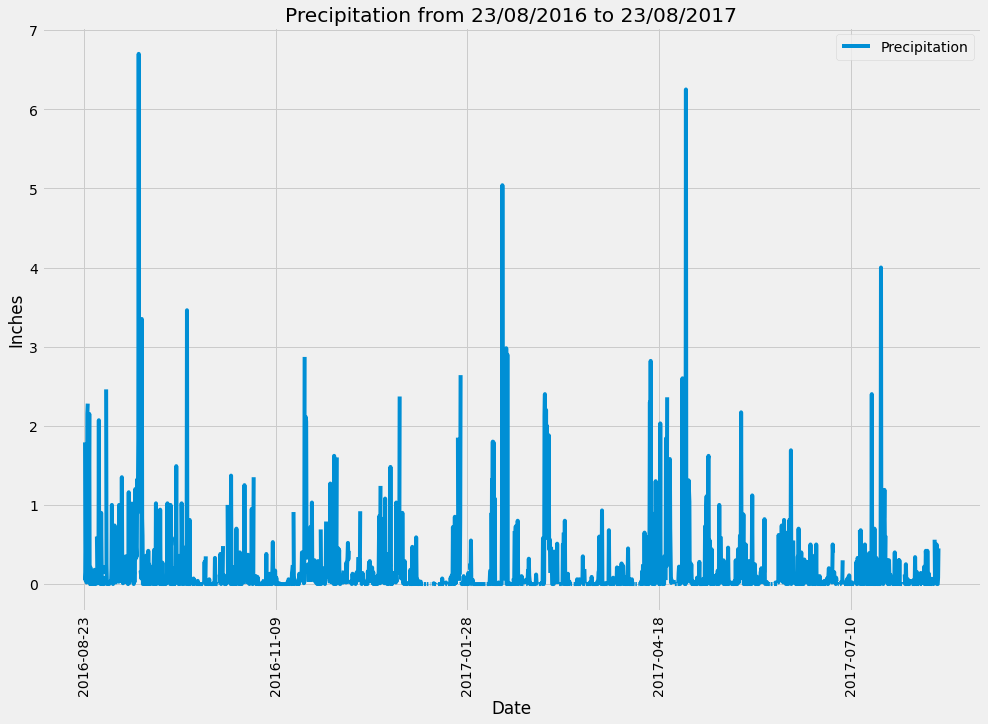

In [235]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(15,10))
plt.title("Precipitation from 23/08/2016 to 23/08/2017")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()

In [236]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

In [237]:
## rows of station table to see how data is stored
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [238]:
# Design a query to show how many stations are available in this dataset?
## will need the unique number as taking from measurement table
no_stations = session.query(Measurement.station).distinct().count()
print(f"There are {no_stations} stations available in this dataset")

There are 9 stations available in this dataset


In [239]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

## inside session.query() brackets place what you want to see
## want to see stations and the number of times they appear, which is a count
## it's a count of the group by of stations
## when doing order, by have to place the whole count function inside brackets
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [267]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [268]:
## lowest temp
lowest_temp = session.query(func.min(Measurement.tobs)).\
                filter_by(station='USC00519281').first()
## this removes brackets 
lowest_temp = lowest_temp[0]
lowest_temp

54.0

In [270]:
## highest temp, apply descending
highest_temp = session.query(func.max(Measurement.tobs)).\
                filter_by(station='USC00519281').first()
## this removes brackets 
highest_temp = highest_temp[0]
highest_temp

85.0

In [271]:
## average temp, 
av_temp = session.query(func.round(func.avg(Measurement.tobs),2)).\
            filter_by(station='USC00519281').first()
av_temp = av_temp[0]
av_temp
            

71.66

In [272]:
name = session.query(Station.name).filter_by(station='USC00519281').first()
name = name[0]
name

'WAIHEE 837.5, HI US'

In [273]:
print(f"The most active station is {name}.")
print(f"The lowest temperature it recorded was {lowest_temp}.")
print(f"The highest temperature it recorded was {highest_temp}.")
print(f"The average temperature it recorded was {av_temp}.")

The most active station is WAIHEE 837.5, HI US.
The lowest temperature it recorded was 54.0.
The highest temperature it recorded was 85.0.
The average temperature it recorded was 71.66.


In [274]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [275]:
highest_obv = session.query(Measurement.station, func.count(Measurement.tobs)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.tobs).desc()).all()
highest_obv

## same answer for most active station, can use name variable again

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [276]:
## can pass in values to select a value in query results
no_obv = highest_obv[0][1]
no_obv

2772

In [277]:
print(f"The station with the highest number of temperature observations is {name},")
print(f"with {no_obv} temperature observations.")

The station with the highest number of temperature observations is WAIHEE 837.5, HI US,
with 2772 temperature observations.


In [278]:
## Use filter greater than or equal to query date 
yearly_tobs = session.query(Measurement.tobs).\
            filter(Measurement.date >= query_date).\
            filter_by(station = 'USC00519281').all()
yearly_tobs

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [279]:
tobs_df = pd.DataFrame(yearly_tobs)
tobs_df.head()

tobs
0  77.0
1  77.0
2  80.0
3  80.0
4  75.0

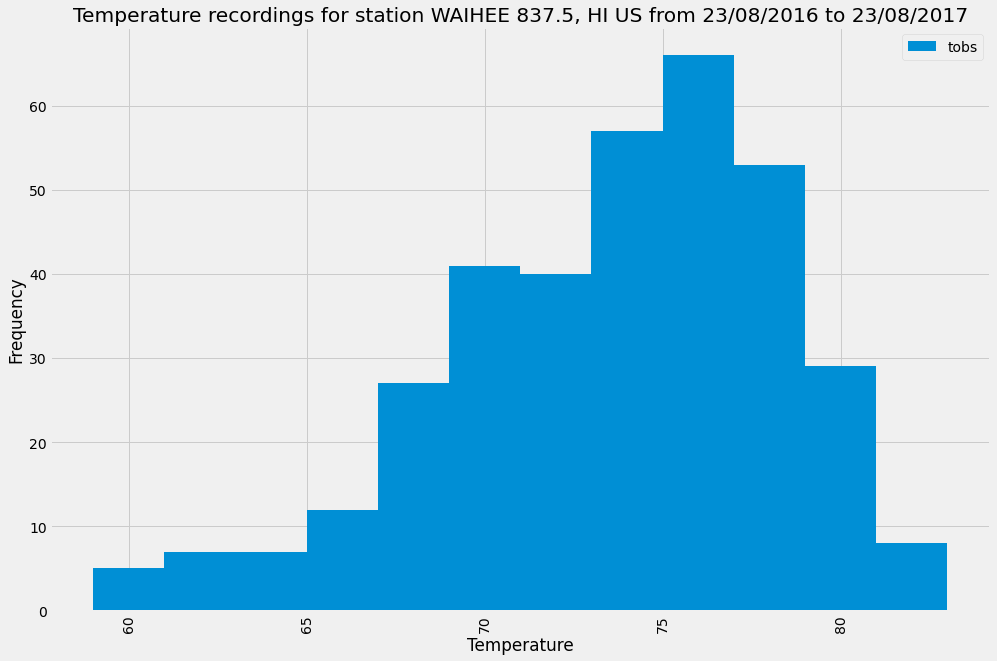

In [280]:
tobs_df.plot.hist(bins=12, figsize=(15,10))
plt.title(f"Temperature recordings for station {name} from 23/08/2016 to 23/08/2017")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
